In [1]:
import numpy as np 
import torch 
import matplotlib.pyplot as plt
from torch.cuda import random

import torch.nn as nn 
import torch.optim as optim

import regression

In [2]:
w_st        = torch.Tensor([-8.,-4.,2.,1.])
x_rang      = torch.Tensor([-3.,2.])
sig         = 0.5
num_samples = 100
seed_train  = 0
seed_val    = 1

X_train, y_train = regression.create_dataset(w_star=w_st,x_range=x_rang,sample_size=num_samples,sigma=sig,seed=seed_train)
X_val, y_val = regression.create_dataset(w_star=w_st,x_range=x_rang,sample_size=num_samples,sigma=sig,seed=seed_val)

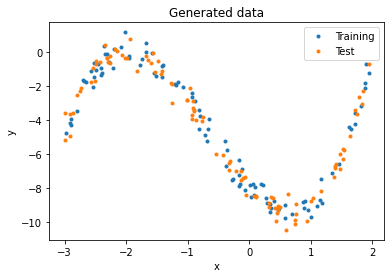

In [3]:
plt.plot(X_train[:,1],y_train,'.',label= 'Training')
plt.plot(X_val[:,1],y_val,'.',label= 'Test')
plt.legend()
plt.title('Generated data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Step 0: train loss: 33.25267028808594
Step 0: val loss: 31.347246170043945
Step 100: train loss: 7.642377853393555
Step 100: val loss: 7.2750372886657715
Step 200: train loss: 2.5729849338531494
Step 200: val loss: 2.4954609870910645
Step 300: train loss: 1.0047155618667603
Step 300: val loss: 0.9741919040679932
Step 400: train loss: 0.49595877528190613
Step 400: val loss: 0.4706629812717438
Step 500: train loss: 0.327467679977417
Step 500: val loss: 0.3020033538341522
Step 600: train loss: 0.2711865305900574
Step 600: val loss: 0.24550390243530273
Step 700: train loss: 0.25232166051864624
Step 700: val loss: 0.22669610381126404
Step 800: train loss: 0.24598932266235352
Step 800: val loss: 0.22051307559013367
Step 900: train loss: 0.24386249482631683
Step 900: val loss: 0.21852630376815796
Step 1000: train loss: 0.2431481033563614
Step 1000: val loss: 0.21791549026966095
Step 1100: train loss: 0.24290814995765686
Step 1100: val loss: 0.21774423122406006
Step 1200: train loss: 0.2428274

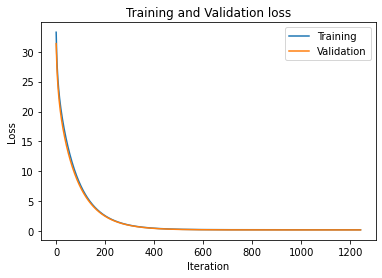

Final model weights: Parameter containing:
tensor([[-7.8553, -4.0753,  1.9758,  1.0087]], requires_grad=True)


In [4]:
torch.manual_seed(10091995)
model_final = regression.poly_regr(X_train,y_train,X_val=X_val,y_val=y_val,learning_rate=0.01,num_steps=1243)
plt.plot(model_final[1],label = 'Training')
plt.plot(model_final[2],label= 'Validation')
plt.title('Training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend()
plt.show()

print('Final model weights:',model_final[0])

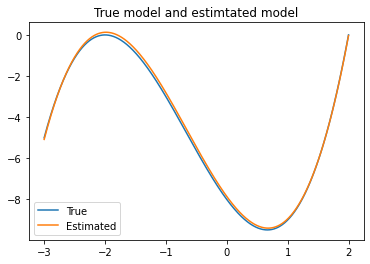

In [5]:
def model_evaluation(x,weights):
    weights = weights.detach().numpy()
    out = (weights[0][-1]*x**3) + (weights[0][-2]*x**2)+(weights[0][-3]*x)+(weights[0][-4])
    return out

xx = np.linspace(-3,2,1000)
y_true=regression.p(xx)
y_estim = model_evaluation(x=xx,weights = model_final[0])
plt.plot(xx,y_true,label = 'True')
plt.plot(xx,y_estim,label='Estimated')
#plt.plot(X_train[:,1],y_train,'.')
plt.title('True model and estimtated model')
plt.legend()
plt.show()